In [2]:
import sep
from astropy.io import fits
from astropy.modeling import rotations
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
%matplotlib inline

In [3]:
f105w = download_file('https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
hdul = fits.open(f105w)
data = hdul[0].data
hdul.info()

Filename: C:\Users\hitom\AppData\Local\Temp\tmpdudkhcrk
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


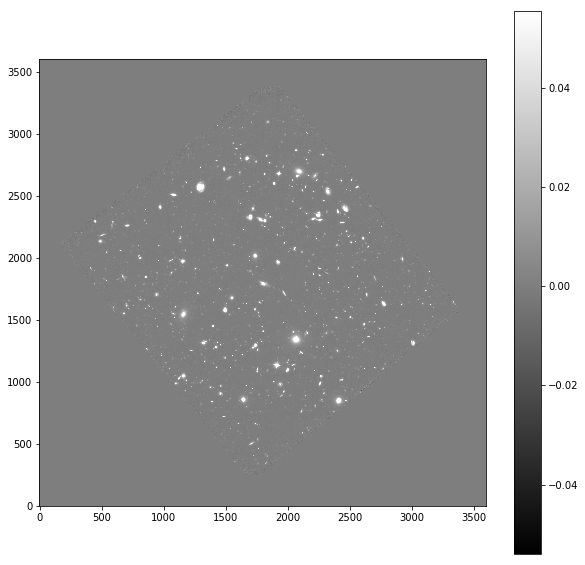

In [4]:
m, s = np.mean(data), np.std(data)
plt.figure(figsize=(10,10))
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [5]:
data = data.byteswap(inplace=True).newbyteorder()
msk = data<0.025
bkg = sep.Background(data, mask=msk, maskthresh=0, bw=32, bh=32, fw=3, fh=3, fthresh=0.0)

In [6]:
print(bkg.globalback)
print(bkg.globalrms)

0.05509808287024498
0.03426799550652504


In [7]:
bkg_f105w = bkg.back()

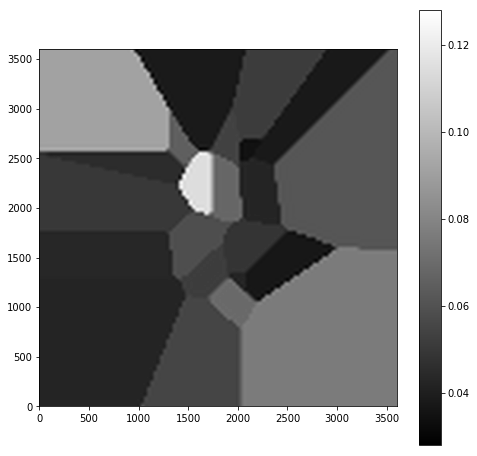

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_f105w, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [9]:
bkg_rms = bkg.rms()

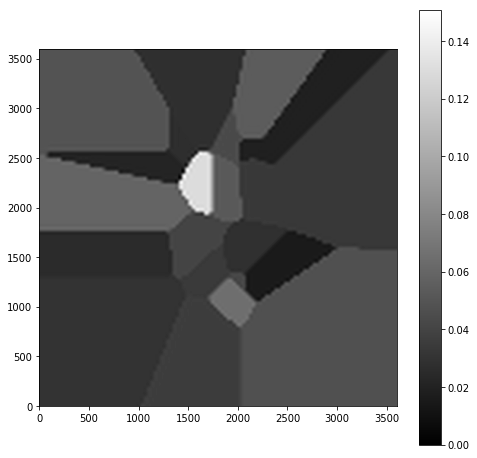

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [11]:
data_sub = data - bkg

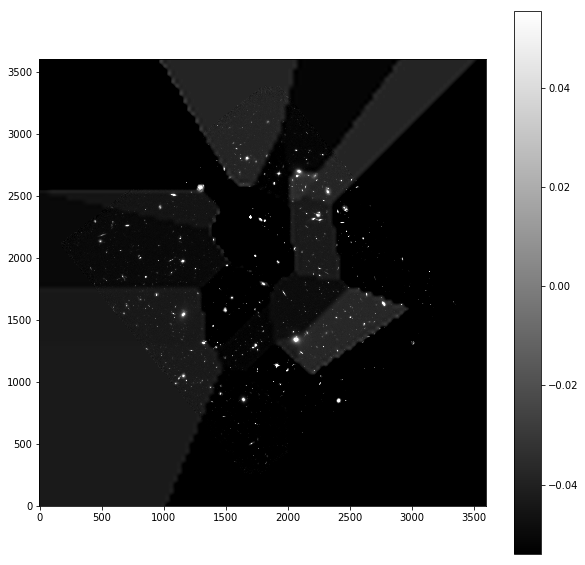

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

In [16]:
objects = sep.extract(data_sub, -0.5, err=bkg.globalrms)

In [17]:
len(objects)

398

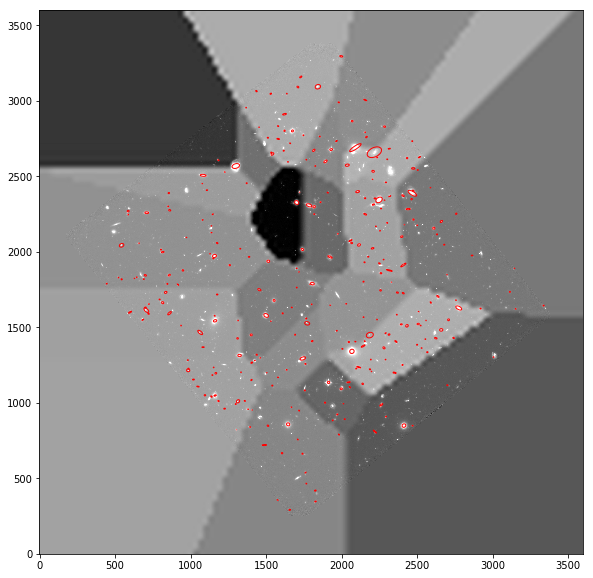

In [18]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(10,10))
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),width=6*objects['a'][i],height=6*objects['b'][i],angle=objects['theta'][i]*180/(2*np.pi))
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)